In [22]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
sess = tf.Session()
import keras
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x_train_,y_train_), (x_test_,y_test_) = mnist.load_data()

In [3]:
input_dim = 784
x_train = x_train_.reshape(60000,input_dim)
x_test = x_test_.reshape(10000,input_dim)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
n_classes = len(set(y_train_))
y_train = np_utils.to_categorical(y_train_,n_classes)
y_test = np_utils.to_categorical(y_test_,n_classes)

In [5]:
output_dim = n_classes = 10
model = Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))
batch_size = 120
n_epoch = 20

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,batch_size,epochs=n_epoch,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 1.2511 - acc: 0.7024 - val_loss: 0.7871 - val_acc: 0.8316
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.6996 - acc: 0.8415 - val_loss: 0.5934 - val_acc: 0.8620
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5761 - acc: 0.8605 - val_loss: 0.5154 - val_acc: 0.8751
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.5168 - acc: 0.8699 - val_loss: 0.4714 - val_acc: 0.8822
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.4805 - acc: 0.8770 - val_loss: 0.4424 - val_acc: 0.8869
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.4555 - acc: 0.8814 - val_loss: 0.4224 - val_acc: 0.8908
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.4370 - acc: 0.8852 - val_loss: 0.4068 - val_acc

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Test Score : ",score[0])
print("Test Accuracy : ",score[1])

Test Score :  0.33201822946071624
Test Accuracy :  0.9085


In [11]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [12]:
history = LossHistory()

In [13]:
model.fit(x_train,y_train,batch_size,epochs=n_epoch,verbose=1,validation_data=(x_test,y_test),callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3481 - acc: 0.9034 - val_loss: 0.3296 - val_acc: 0.9093
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3454 - acc: 0.9044 - val_loss: 0.3276 - val_acc: 0.9095
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3430 - acc: 0.9049 - val_loss: 0.3251 - val_acc: 0.9101
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.3406 - acc: 0.9051 - val_loss: 0.3233 - val_acc: 0.9103
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3385 - acc: 0.9055 - val_loss: 0.3215 - val_acc: 0.9116
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3364 - acc: 0.9067 - val_loss: 0.3197 - val_acc: 0.9118
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.3345 - acc: 0.9069 - val_loss: 0.3181 - val_acc

In [14]:
print(history.losses)

[0.29354784, 0.29786545, 0.39028582, 0.50736636, 0.3390849, 0.45776284, 0.2842261, 0.27679363, 0.32161823, 0.3789107, 0.46508798, 0.39004785, 0.3708094, 0.29822713, 0.32745743, 0.32248703, 0.48386905, 0.30189592, 0.4041398, 0.29762995, 0.39758545, 0.3357232, 0.34941527, 0.3694177, 0.32683823, 0.2702089, 0.3050563, 0.29165354, 0.23240311, 0.20665146, 0.38243797, 0.2171642, 0.32504022, 0.19518042, 0.4005993, 0.33780223, 0.42014033, 0.48589197, 0.32802376, 0.24844608, 0.35117492, 0.38543022, 0.3933464, 0.32454336, 0.30977923, 0.25351268, 0.31188768, 0.44595307, 0.40735182, 0.40253028, 0.28982753, 0.36334106, 0.26776415, 0.32698962, 0.33014375, 0.34973362, 0.25005922, 0.45063254, 0.23069112, 0.27349204, 0.53779465, 0.25634515, 0.44572365, 0.48251522, 0.33590174, 0.3425271, 0.2930507, 0.30100885, 0.41597173, 0.43690273, 0.3581939, 0.36046028, 0.30674306, 0.44206804, 0.44978064, 0.29359707, 0.30547917, 0.38759798, 0.3914358, 0.38296616, 0.37902945, 0.38754216, 0.35236105, 0.27422044, 0.34283

In [15]:
model.save_weights('./mnist_lr_weights.h5', overwrite=True)

In [16]:
model.save('./mnist_lr.h5')

In [18]:
loaded_model = load_model('./mnist_lr.h5')

In [19]:
preds = loaded_model.predict(x_test)

In [32]:
preds[8] # wrong prediction of 5, it predicts 6

array([6.88828202e-03, 7.62603231e-05, 1.64906848e-02, 4.18528725e-06,
       1.32179605e-02, 5.29988296e-03, 9.53852594e-01, 7.97062876e-06,
       3.43935541e-03, 7.22789555e-04], dtype=float32)

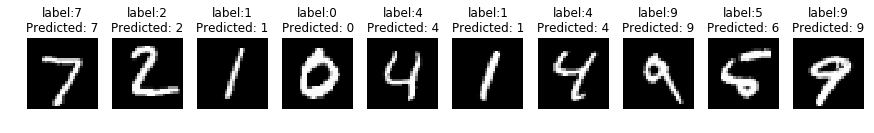

In [33]:
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test_[i],cmap='gray')
    plt.title('label:{}\nPredicted: {}'.format(np.argmax(y_test[i]),np.argmax(preds[i]))) # argmax returns tha max index value.
    plt.axis('off')
plt.show()